In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("Academic-Performance-Dataset.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'Academic-Performance-Dataset.csv'

In [4]:
df.shape
df.dtypes

NameError: name 'df' is not defined

In [5]:
df.isna().sum()

NameError: name 'df' is not defined

In [6]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

NameError: name 'df' is not defined

In [7]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df

NameError: name 'df' is not defined

In [8]:
df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
df['Percentage']=df['Total Marks']/5

df

NameError: name 'df' is not defined

NameError: name 'df' is not defined

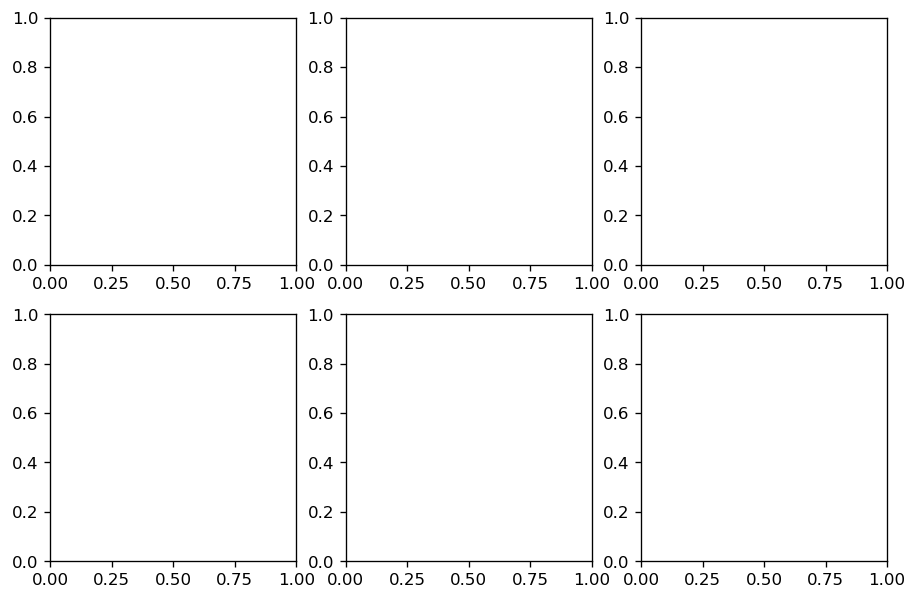

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

In [10]:
Q1 = df['Che_marks'].quantile(0.25)
Q3 = df['Che_marks'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')


NameError: name 'df' is not defined

In [11]:
df[(df['Che_marks'] < Lower_limit) | (df['Che_marks'] > Upper_limit)]

NameError: name 'df' is not defined

In [12]:
def BinningFunction(column, cut_points, labels = None) :
    break_points=[column.min()] + cut_points + [column.max( )]
    print('Gradding According to percentage \n>60 = F \n60-70 = B \n70-80 = A\n80-100 = O')
    return pd.cut(column, bins=break_points, labels=labels, include_lowest=True)
cut_points=[60, 70, 80]
labels=['F', 'B', 'A', 'O']
df['Grade']=BinningFunction(df['Percentage'], cut_points, labels)

df

NameError: name 'df' is not defined